# **Electric Vehicle Sales By State In India**

## **1) Setup and Initialization**

In [5]:
# import data manipulation package:

import numpy as np
import pandas as pd

# import data visualization package

import matplotlib.pyplot as plt
import seaborn as sns

# supressing all the warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset:

df = pd.read_csv(r'F:\Coding\1) Internship - Unified Mentor\Project List\1) My Unified Mentor Projects\4) Electric Vehicle Sales by State in India\Upload\Electric Vehicle Sales by State in India.csv')

## **2) Initial Data Analysis**

In [8]:
# Take a brief look at the data:

df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [9]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [10]:
# Get the dimensions of the DataFrame:

df.shape

(96845, 8)

In [11]:
# Get the row index of the datafreame:

df.index

RangeIndex(start=0, stop=96845, step=1)

In [12]:
# Get the column names of the Dataframe:

df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [13]:
# Check Datatype of each column:

df.dtypes

Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

In [14]:
# Looking at the basic information of the dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [15]:
# Generate descriptive statistics for numerical columns

df.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


## **3) Data Cleaning & Preprocessing**

In [16]:
# Looking for any Missing Values:

df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [17]:
# Check number of duplicate data

print('Total no. of duplicate values =', df.duplicated().sum())

Total no. of duplicate values = 0


In [18]:
df2 = df.copy()       # Copy of df assigned to df2. Any changes made to df2 will not affect df & vice-versa
df2.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [19]:
# Convert all column names to lowercase
df2.columns = df2.columns.str.lower()

# Display updated column names
df2.columns

Index(['year', 'month_name', 'date', 'state', 'vehicle_class',
       'vehicle_category', 'vehicle_type', 'ev_sales_quantity'],
      dtype='object')

In [20]:
# Convert datatype of 'date_added' column to 'datetime' datatype

df2['date'] = pd.to_datetime(df2['date'])

# Show datatype to confirm changes

print(df2['date'].dtypes)

datetime64[ns]


In [21]:
# Extract month column from 'date' column

df2['month_added'] = df2['date'].dt.month

df2.head()

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity,month_added
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,1
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,1
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,1
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,1
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,1


In [22]:
# Check datatype of added columns

df2['month_added'].dtypes

dtype('int32')

In [23]:
# Convert datatype of 'year', 'ev_sales_quantity' & 'month_added' column to 'int' datatype

df2['year'] = df2['year'].astype(int)
df2['ev_sales_quantity'] = df2['ev_sales_quantity'].astype(int)
df2['month_added'] = df2['month_added'].astype(int)

# Show datatype to confirm changes

print(df2['year'].dtypes)
print(df2['ev_sales_quantity'].dtypes)
print(df2['month_added'].dtypes)

int64
int64
int64


### **Standardize Categorical Values**

In [24]:
# Remove leading/trailing spaces in string columns

df2['state'] = df2['state'].str.strip()  # strip() removes leading and trailing whitespace characters from each string

df2['vehicle_type'] = df2['vehicle_type'].str.strip()

df2['vehicle_category'] = df2['vehicle_category'].str.strip()

df2['vehicle_class'] = df2['vehicle_class'].str.strip()

In [25]:
# Convert categorical columns to lowercase

df2['state'] = df2['state'].str.lower()

df2['vehicle_type'] = df2['vehicle_type'].str.lower()

df2['vehicle_category'] = df2['vehicle_category'].str.lower()

df2['vehicle_class'] = df2['vehicle_class'].str.lower()

df2.head()

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity,month_added
0,2014,jan,2014-01-01,andhra pradesh,adapted vehicle,others,others,0,1
1,2014,jan,2014-01-01,andhra pradesh,agricultural tractor,others,others,0,1
2,2014,jan,2014-01-01,andhra pradesh,ambulance,others,others,0,1
3,2014,jan,2014-01-01,andhra pradesh,articulated vehicle,others,others,0,1
4,2014,jan,2014-01-01,andhra pradesh,bus,bus,bus,0,1


### **Final Dataset Check**

In [26]:
# Basic information of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               96845 non-null  int64         
 1   month_name         96845 non-null  object        
 2   date               96845 non-null  datetime64[ns]
 3   state              96845 non-null  object        
 4   vehicle_class      96845 non-null  object        
 5   vehicle_category   96845 non-null  object        
 6   vehicle_type       96845 non-null  object        
 7   ev_sales_quantity  96845 non-null  int64         
 8   month_added        96845 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 6.6+ MB


In [27]:
# Final null check

df2.isnull().sum()

year                 0
month_name           0
date                 0
state                0
vehicle_class        0
vehicle_category     0
vehicle_type         0
ev_sales_quantity    0
month_added          0
dtype: int64

In [28]:
# Save the cleaned DataFrame to CSV

# df2.to_csv('electric_vehicle_sales_in_india_cleaned.csv', index=False)

## **4) Exploratory Data Analysis (EDA)**

### **A) Outlier Detection**

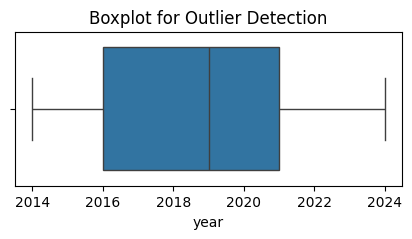

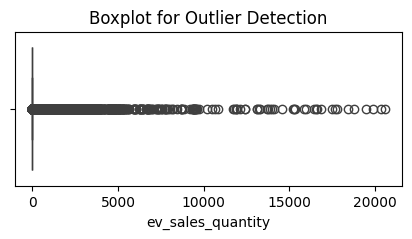

In [29]:
# Identifying Outliers

for col in ['year', 'ev_sales_quantity']:
  plt.figure(figsize=(5,2))
  sns.boxplot(x=df2[col])
  plt.title('Boxplot for Outlier Detection')
  plt.show()

**CHART INSIGHT:**

*   **Year:** The 'year' column does not show any significant outliers, indicating that the data is well within the expected range of years covered.
*   **EV Sales Quantity:** The 'ev_sales_quantity' column exhibits a significant number of outliers. The boxplot shows that the majority of sales quantities are concentrated at or near zero, while there are numerous data points with extremely high sales values that fall far outside the typical range, pulling the mean significantly higher than the median. **These large values are important to note as they represent exceptional sales events**.



In [30]:
# Set plot style for better visuals

sns.set_style('whitegrid')

### **B) Vehicle Type Analysis**

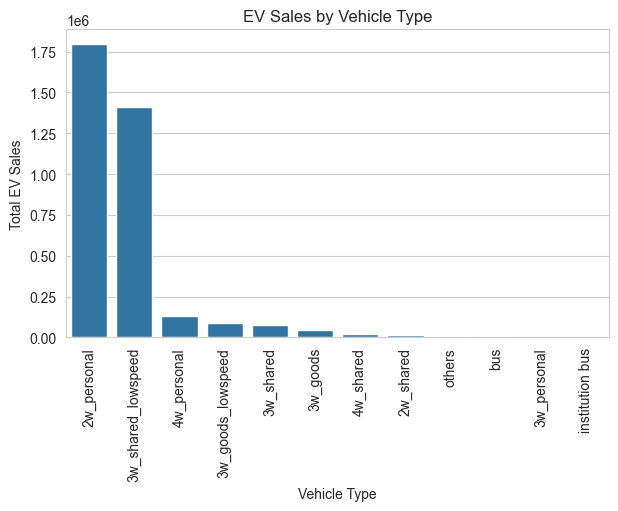

In [31]:
# Calculate total sales by vehicle type
vehicle_type_sales = df2.groupby('vehicle_type')['ev_sales_quantity'].sum().reset_index()

# Sort vehicle types in descending order of sales
vehicle_type_sales = vehicle_type_sales.sort_values(by='ev_sales_quantity', ascending=False)  # Sort highest to lowest

# Plot vehicle type sales
plt.figure(figsize=(7,4))
sns.barplot(data=vehicle_type_sales,
            x='vehicle_type',
            y='ev_sales_quantity')  # Barplot
plt.title("EV Sales by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=90)
plt.show()

**CHART INSIGHT:**

*   **Two-Wheelers Dominate:** Two-wheelers account for the overwhelming majority of EV sales, indicating a strong preference or adoption rate for electric motorcycles and scooters in India.
*   **Three-Wheelers are Second:** Three-wheelers follow as the second most popular category, suggesting significant use in commercial or passenger transport.
*  **Four-Wheelers Lag:** Four-wheelers, including personal and goods vehicles, have significantly lower sales compared to two- and three-wheelers, which could imply barriers to adoption such as higher costs, charging infrastructure, or availability.
*   **Buses and Others are Minimal:** Buses and other vehicle types have very minimal EV sales, indicating these segments are still in very nascent stages of electrification.

### **C) State-wise EV Sales Analysis**

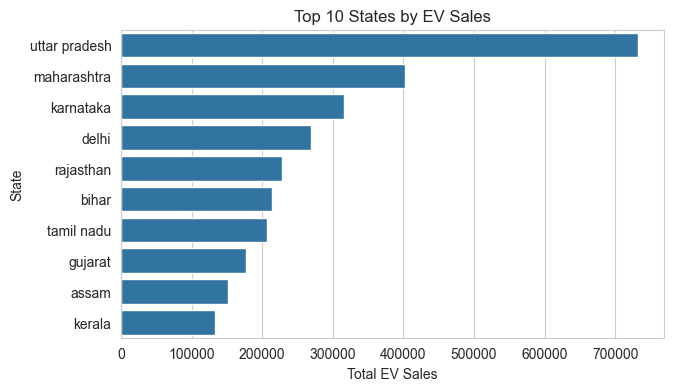

In [32]:
# Group by state and calculate total sales
state_sales = df2.groupby('state')['ev_sales_quantity'].sum().reset_index()

# Sort states by highest sales
state_sales = state_sales.sort_values(by='ev_sales_quantity', ascending=False)

# Plot top 10 states
plt.figure(figsize=(7,4))  # Set figure size
sns.barplot(data=state_sales.head(10),
            x='ev_sales_quantity',
            y='state')
plt.title("Top 10 States by EV Sales")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.show()

**CHART INSIGHT:**

*   **Uttar Pradesh Leads:** Uttar Pradesh emerges as the clear leader in EV sales, indicating a strong market presence or favorable policies in this state.
*   **Maharashtra and Karnataka Follow:** Maharashtra and Karnataka show significant EV sales, securing the second and third positions respectively, suggesting robust adoption in these major economic hubs.
*   **Varied Adoption Across States:** The sales figures show a considerable drop-off after the top three states, indicating varying levels of EV adoption and market maturity across different regions in India.
*   **Focus on Top States:** The data suggests that efforts or incentives for EV adoption might be concentrated in or more effective in these leading states.

### **D) Vehicle Category Analysis**

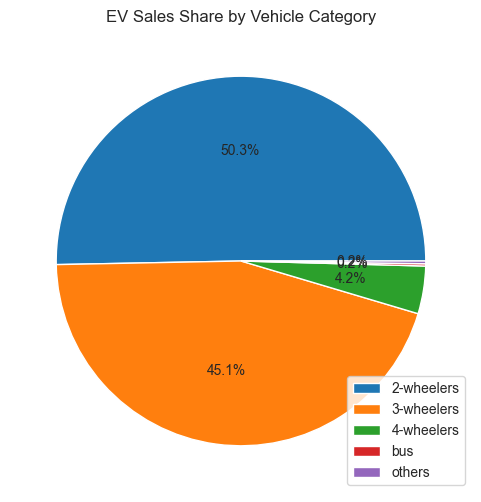

In [33]:
category_sales = df2.groupby('vehicle_category')['ev_sales_quantity'].sum().reset_index()

plt.figure(figsize=(6,6))

plt.pie(category_sales['ev_sales_quantity'], autopct='%1.1f%%')
# Draw a pie chart using the 'ev_sales_quantity' values
# autopct='%1.1f%%' shows percentages on each slice with 1 decimal place

plt.legend(category_sales['vehicle_category'], loc="best")
# Add a legend with labels from 'vehicle_category'
# loc="best" automatically places the legend in the optimal position

plt.title("EV Sales Share by Vehicle Category")
plt.show()

**CHART INSIGHT:**

*   **Two-Wheelers Dominate (50.3% of total sales):** Electric two-wheelers account for over half of all EV sales, making them the most popular vehicle category by a significant margin. This suggests a very high adoption rate for electric motorcycles and scooters in India.
*   **Three-Wheelers are a Strong Second (45.1% of total sales):** Electric three-wheelers follow closely, capturing nearly half of the market. This indicates their strong presence, likely driven by commercial and public transportation uses.
*   **Four-Wheelers Lag Significantly (4.2% of total sales):** Four-wheelers, including personal and goods vehicles, represent a much smaller share of the market. This suggests slower adoption compared to their two and three-wheeled counterparts, possibly due to factors like higher cost, charging infrastructure limitations, or vehicle availability.
*   **Minimal Contribution from Buses and Other Categories (0.2% and 0.2% respectively):** Buses and other vehicle types contribute very little to the total EV sales, indicating that these segments are still in very nascent stages of electrification or face significant barriers to entry.

### **E) Time-Based Yearly Trend Analysis**

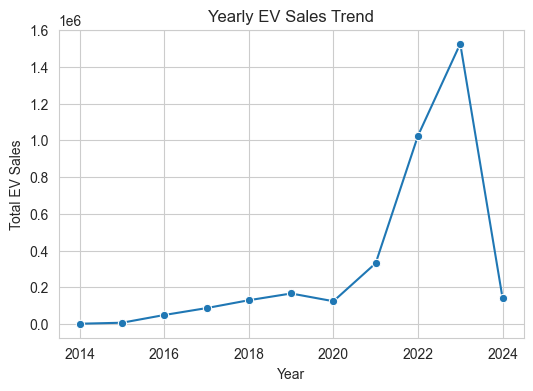

In [34]:
# Calculate yearly sales
yearly_sales = df2.groupby('year')['ev_sales_quantity'].sum().reset_index()

# Plot yearly trend
plt.figure(figsize=(6,4))
sns.lineplot(data=yearly_sales,
             x='year',
             y='ev_sales_quantity',
             marker='o')  # Line plot with markers
plt.title("Yearly EV Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.show()

**CHART INSIGHT:**

*   **Gradual Growth in Early Years (2014-2019):** EV sales showed a slow but consistent increase from 2014 to 2019, indicating an initial phase of market development and limited adoption.
*   **Dip in 2020:** There was a noticeable decline in sales in 2020, which can likely be attributed to global events such as the COVID-19 pandemic impacting manufacturing, supply chains, and consumer spending.
*   **Exponential Growth Post-2020 (2021-2023):** Following the dip in 2020, EV sales experienced an exponential surge from 2021 to 2023. This indicates a rapid acceleration in EV adoption, possibly driven by government incentives, increasing consumer awareness, improving infrastructure, and wider model availability.
*   **Partial Data for 2024:** The sales figures for 2024 are significantly lower, which is expected as the dataset likely only includes partial data for that year.

### **F) Monthly Sales Pattern**

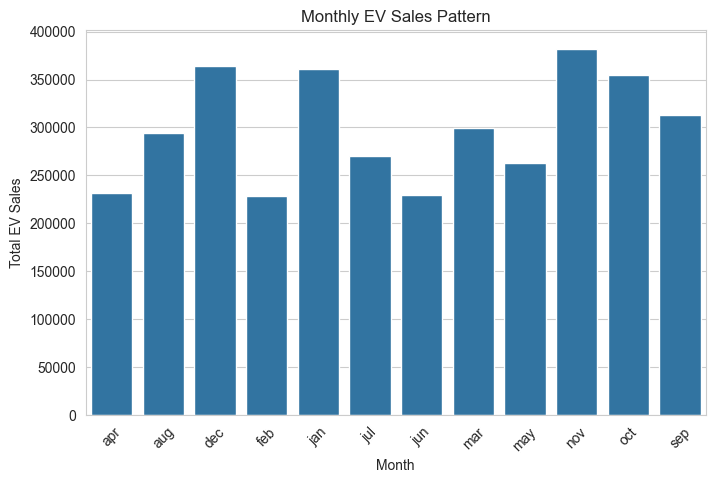

In [35]:
# Calculate monthly sales
monthly_sales = df2.groupby('month_name')['ev_sales_quantity'].sum().reset_index()

# Plot monthly trend
plt.figure(figsize=(8,5))
sns.barplot(data=monthly_sales,
            x='month_name',
            y='ev_sales_quantity')
plt.title("Monthly EV Sales Pattern")
plt.xlabel("Month")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=45)  # Rotate month labels
plt.show()

**CHART INSIGHT:**

*   **Peak Sales Towards Year-End and Beginning:** EV sales show a clear upward trend towards the end of the year and into the beginning of the next, with November, December, January, and October recording the highest sales figures. This could be attributed to festive seasons, year-end targets, or new year incentive schemes.
*   **Mid-Year Dip:** There is a noticeable dip in EV sales during the mid-year months, particularly in February, June, April, May, and July. This pattern might indicate a seasonal slowdown or a period where fewer incentives are typically offered.
*   **Consistent Fluctuation:** While there are clear peaks and troughs, the overall monthly sales demonstrate consistent activity throughout the year, with a general trend of higher sales in the latter half of the year compared to the first half.

### **G) Correlation Analysis**

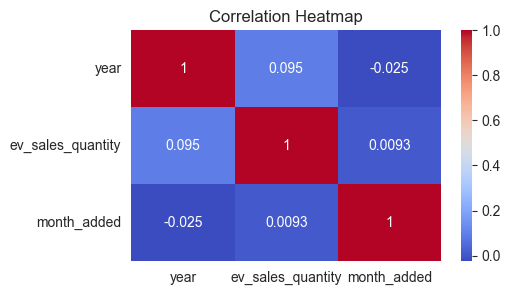

In [36]:
numeric_cols = ['year', 'ev_sales_quantity', 'month_added']

# Compute correlation matrix
corr_matrix = df2[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**CHART INSIGHT:**

*   **Year and EV Sales Quantity (0.095):** There is a weak positive correlation between 'year' and 'ev_sales_quantity'. This suggests that as years progress, EV sales tend to increase, but not very strongly. This aligns with the 'Yearly EV Sales Trend' which showed a significant increase in recent years, but the correlation value itself indicates that other factors might have a stronger influence on sales.
*   **Month Added and EV Sales Quantity (0.0093):** The correlation between 'month_added' and 'ev_sales_quantity' is very close to zero, indicating an extremely weak to negligible linear relationship. This implies that the month of the year has little direct linear impact on the total EV sales quantity across all years, though seasonal patterns might exist as observed in the 'Monthly Sales Pattern' chart (which this correlation does not capture directly).

## **5) Code for MySQL**

In [37]:
# install pymysql sqlalchemy
!pip install pymysql sqlalchemy
from sqlalchemy import create_engine


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# Connect to MySQL
from sqlalchemy import create_engine

username = 'root'
password = 'admin7subrata1989'
host = 'localhost'
port = '3306'
database = 'electric_vehicle_sales_project'

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [39]:
# Load DataFrame to MySQL

table_name = 'ev_sales_data'
df2.to_sql(table_name, engine, if_exists = 'replace', index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'ev_sales_data' in database 'electric_vehicle_sales_project'.


In [40]:
# Read back sample
pd.read_sql("select * from ev_sales_data limit 5", engine)

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity,month_added
0,2014,jan,2014-01-01,andhra pradesh,adapted vehicle,others,others,0,1
1,2014,jan,2014-01-01,andhra pradesh,agricultural tractor,others,others,0,1
2,2014,jan,2014-01-01,andhra pradesh,ambulance,others,others,0,1
3,2014,jan,2014-01-01,andhra pradesh,articulated vehicle,others,others,0,1
4,2014,jan,2014-01-01,andhra pradesh,bus,bus,bus,0,1
